In [134]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [135]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "series12"
HOST = "localhost"
PORT = 5432
DATABASE = "crowdfunding_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [136]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

contacts
--------
contact_id INTEGER
first_name VARCHAR(50)
last_name VARCHAR(50)
email VARCHAR(50)
campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(50)
project_description VARCHAR(100)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(50)
backers_count INTEGER
country VARCHAR(50)
currency VARCHAR(50)
launch_date DATE
end_date DATE
category_ids VARCHAR(50)
subcategory_ids VARCHAR(50)
category
--------
category_ids VARCHAR(50)
category VARCHAR(50)
subcategory
--------
subcategory_ids VARCHAR(50)
subcategory VARCHAR(50)
category_ids
--------
category_ids TEXT
category TEXT
subcategory_ids
--------
subcategory_ids TEXT
subcategory TEXT
contact_id
--------
contact_id BIGINT
first_name TEXT
last_name TEXT
email TEXT
cf_id
--------
cf_id BIGINT
contact_id BIGINT
company_name TEXT
project_description TEXT
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome TEXT
backers_count BIGINT
country TEXT
currency TEXT
launch_date TEXT
end_date TEXT
category_ids TE

In [137]:
conn = engine.connect()

In [138]:
query = text(f"""SELECT country,
       COUNT(cam.cf_id) AS total_campaigns,
       SUM(CASE WHEN cam.outcome = 'successful' THEN 1 ELSE 0 END) AS successful_campaigns
FROM campaign cam
GROUP BY country
ORDER BY total_campaigns DESC;
             """)

df = pd.read_sql(query, con=conn)
df.head()

,country,total_campaigns,successful_campaigns
0,US,763,436
1,GB,48,28
2,IT,48,26
3,CA,44,22
4,AU,43,24


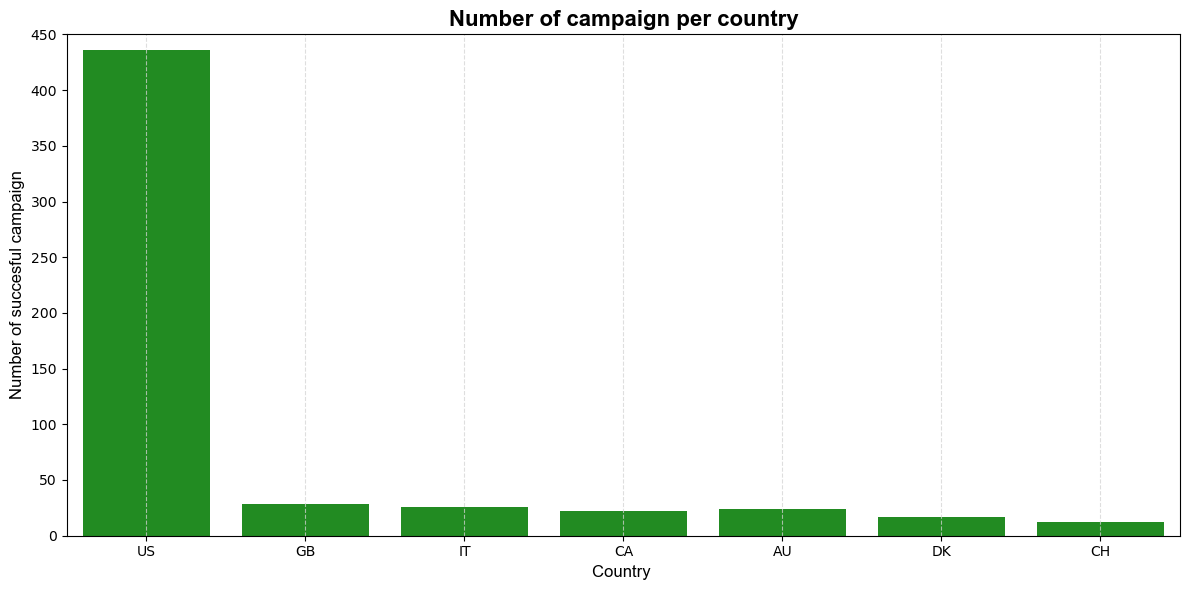

In [139]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(df.country, df.successful_campaigns, color="forestgreen", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Country ", fontfamily="Arial", fontsize=12)
plt.ylabel("Number of succesful campaign", fontfamily="Arial", fontsize=12)
plt.title("Number of campaign per country", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(-0.5, 6.5)
plt.ylim(0, 450)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("Number of successful campaigns for each country.png")
plt.show()

In [140]:
query = text(f"""SELECT company_name, goal, pledged, (pledged / goal * 100) AS percent_funded
    FROM campaign
    WHERE goal > 0
    ORDER BY percent_funded DESC 
    LIMIT 10;
    """)

df2 = pd.read_sql(query, con=conn)
df2.head()

,company_name,goal,pledged,percent_funded
0,Williams-Jones,600.0,14033.0,2338.833333
1,Garza-Bryant,800.0,14725.0,1840.625000
2,"Smith, Love and Smith",800.0,13474.0,1684.250000
3,Ramirez-Myers,900.0,14547.0,1616.333333
4,Green-Carr,900.0,14324.0,1591.555556


In [141]:
# Labels for the sections of our pie chart
company_name = ["Williams-Jones", "Garza-Bryant", "Smith, Love and Smith", "Ramirez-Myers", "Green-Carr"]

# The values of each section of the pie chart
sizes = [220, 180, 160, 160, 150]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "forestgreen"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0, 0, 0)



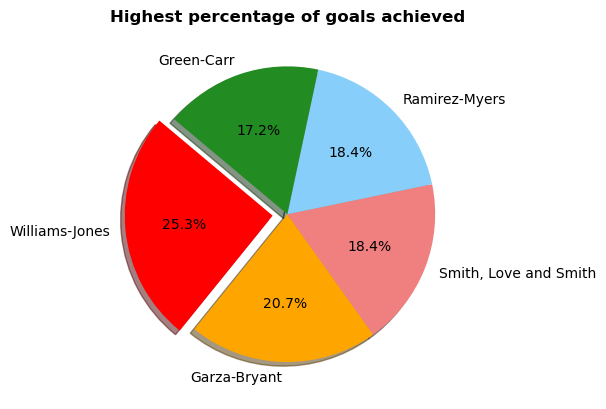

In [142]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=company_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Add in reference lines
# Add Labels/Title
plt.title("Highest percentage of goals achieved", fontweight="bold")
plt.savefig("Highest percentage of goals achieved.png")

plt.show()

In [143]:
query = text(f"""SELECT company_name, project_description, goal, pledged, (pledged / goal) AS success_ratio
FROM campaign
ORDER BY success_ratio DESC
LIMIT 5;
             """)
             
df3 = pd.read_sql(query, con=conn)
df3.head()        

,company_name,project_description,goal,pledged,success_ratio
0,Williams-Jones,Monitored incremental info-mediaries,600.0,14033.0,23.388333
1,Garza-Bryant,Programmable leadingedge contingency,800.0,14725.0,18.406250
2,"Smith, Love and Smith",Grass-roots mission-critical capability,800.0,13474.0,16.842500
3,Ramirez-Myers,Switchable intangible definition,900.0,14547.0,16.163333
4,Green-Carr,Pre-emptive bifurcated artificial intelligence,900.0,14324.0,15.915556


In [144]:
# Labels for the sections of our pie chart
company_name = ["Williams-Jones", "Garza-Bryant", "Smith, Love and Smith", "Ramirez-Myers", "Green-Carr"]

# The values of each section of the pie chart
sizes = [220, 180, 160, 160, 150]

# The colors of each section of the pie chart
colors = ["darkgreen", "maroon", "purple", "orange", "navy"]

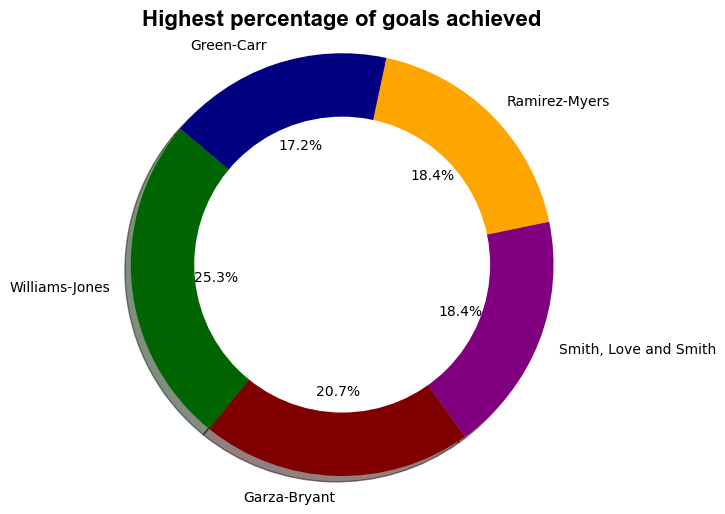

<Figure size 640x480 with 0 Axes>

In [145]:
# Data Viz Recipe
data = df3
# Change Canvas Size
plt.figure(figsize=(6, 6))
# Create a basic plot
plt.pie(sizes, labels=company_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)# Customizations
# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)
# Change colors
# Add in reference lines
# Add Labels/Title
plt.title(f"Highest percentage of goals achieved", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.axis("equal")
# Show/Save the Graph
plt.show()

plt.savefig("Highest percentage of goals achieved(donut).png")

In [146]:
query = text(f"""SELECT cat.category, SUM(c.pledged) AS total_funding
FROM campaign c
JOIN category cat ON c.category_ids = cat.category_ids
GROUP BY cat.category
ORDER BY total_funding DESC
LIMIT 3;
             """)

df4 = pd.read_sql(query, con=conn)
df4.head() 

,category,total_funding
0,theater,15763227.0
1,film & video,7510076.0
2,music,7480097.0


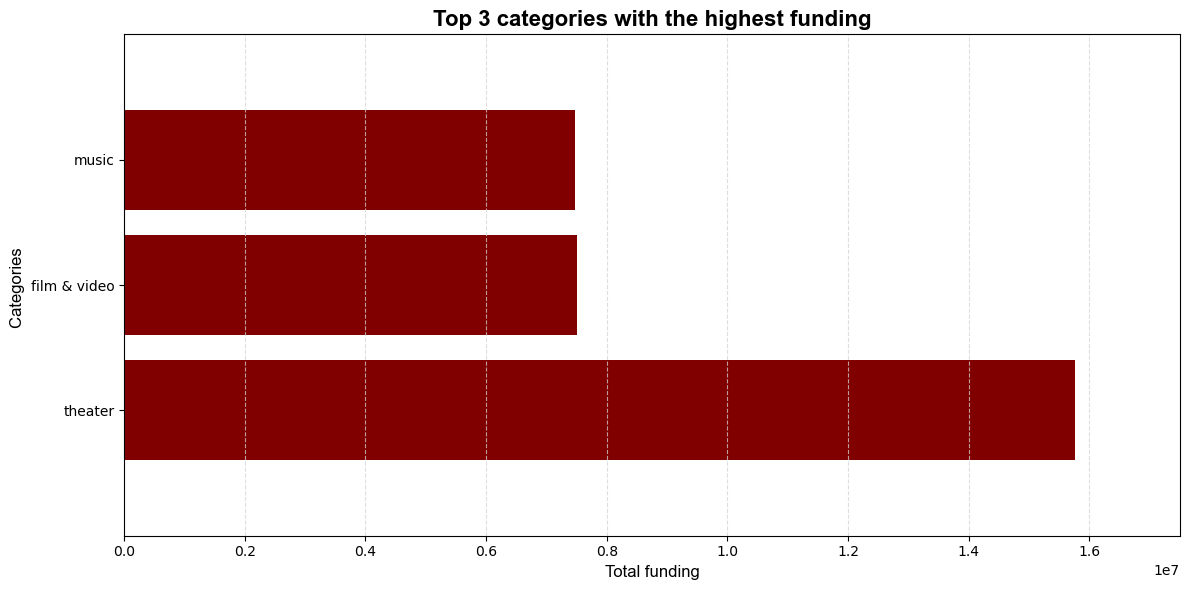

In [147]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(df4.category, df4.total_funding, color="maroon", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Categories ", fontfamily="Arial", fontsize=12)
plt.xlabel("Total funding", fontfamily="Arial", fontsize=12)
plt.title("Top 3 categories with the highest funding", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(0, 17500000)
plt.ylim(-1, 3)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.tight_layout()
plt.savefig("Top 3 categories with the highest funding.png")
plt.show()

